Image Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM project/training_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 15130 images belonging to 9 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM project/test_set",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 1035 images belonging to 9 classes.


Model Building

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(200,activation='relu'))
model.add(Dense(9,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [ ]:
len(x_train)

505

In [ ]:
len(x_test)

35

In [ ]:
model.fit(x_train,epochs=10,validation_data=x_test,steps_per_epoch=len(x_train)//10,validation_steps=len(x_test))

Epoch 1/10
50/50 [==============================] - 407s 8s/step - loss: 0.1036 - accuracy: 0.9707 - val_loss: 0.1421 - val_accuracy: 0.9362
Epoch 2/10
50/50 [==============================] - 75s 1s/step - loss: 0.0937 - accuracy: 0.9767 - val_loss: 0.0786 - val_accuracy: 0.9768
Epoch 3/10
50/50 [==============================] - 74s 1s/step - loss: 0.0833 - accuracy: 0.9740 - val_loss: 0.0380 - val_accuracy: 0.9894
Epoch 4/10
50/50 [==============================] - 65s 1s/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.0354 - val_accuracy: 0.9913
Epoch 5/10
50/50 [==============================] - 56s 1s/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.0484 - val_accuracy: 0.9913
Epoch 6/10
50/50 [==============================] - 58s 1s/step - loss: 0.0661 - accuracy: 0.9813 - val_loss: 0.0597 - val_accuracy: 0.9894
Epoch 7/10
50/50 [==============================] - 50s 1s/step - loss: 0.0488 - accuracy: 0.9872 - val_loss: 0.0888 - val_accuracy: 0.9662
Epoch 8/10
50/50 [=

In [ ]:
model.save("aslpng.h5")

Testing the model

In [ ]:
from keras.models import load_model
import numpy as np
import cv2

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

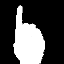

In [ ]:
model=load_model("aslpng.h5")
img = image.load_img(r"/content/drive/MyDrive/IBM project/test_set/D/10.png",target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 63ms/step


In [ ]:
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
class_name=["A","B","C","D","E","F","G","H","I"]
pred_id = pred.argmax(axis=1)[0]
pred_id

3

In [ ]:
print("the alphabet is ",str(class_name[pred_id]))

the alphabet is  D
